<a href="https://colab.research.google.com/github/eftekhar-hossain/SKBI_Training/blob/main/Intermediate/Session_8_(Text_CNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center> <h1> <u> <font color='red'> Training on AI and ML with Python (Intermediate) </font> </u> </h1> </center>

In [ ]:
%%time
import os
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re
import nltk
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
import tensorflow as tf
from tensorflow import keras

CPU times: user 32 µs, sys: 4 µs, total: 36 µs
Wall time: 39.1 µs


# Bangla Aggression Dataset


In [ ]:
!wget -O aggression.zip https://www.dropbox.com/s/uwenro90496krax/aggression.zip?dl=0

In [ ]:
# extract the zip file and save the files into bangla-digit folder
import zipfile
zip_ref = zipfile.ZipFile("aggression.zip", 'r')
zip_ref.extractall("")
zip_ref.close()

In [ ]:
%%time
               
dataset = pd.read_excel("aggression/train-multi.xlsx")
dataset = dataset.iloc[:,1:]
dataset

CPU times: user 734 ms, sys: 50.2 ms, total: 785 ms
Wall time: 909 ms


In [ ]:
dataset

In [ ]:
dataset.columns

Index(['cleaned', 'Class', 'Label'], dtype='object')

In [ ]:
number_of_classes = len(dataset['Class'].unique())

In [ ]:
labels = np.array(dataset['Class'])
print('Total size of the dataset : ',len(dataset))

Total size of the dataset :  5446


In [ ]:
## Printing the raw dataset
for i in list(np.random.randint(1,len(dataset),10)):
  print(dataset['cleaned'][i],"\n",dataset['Class'][i])

আওয়ামিলীগ আর কয়েক বছর কমতাই তাকলে বাংলাদেশ তেকে মুসলমাল ইমান নিয়ে বাচতে পারবে না 
 PoAG
খানকি  মহিলা  তুই  তো  দেখি  এখনো  ভিখারি  ই  আছিস 
 VeAG
এটাই পারেন ইসলাম মিথ্যা চার করে কতদিন 
 ReAG
ইসলাম বকামুল্লা বরবর পুরোনো বরবর নিয়ম মেনে চলে ও ইসলাম না মানলে কুত্তা বিড়াল এর চেয়ে নিকৃষ্ট বলতে লজ্জা লাগেনা মুসলমানদের ইসলাম মানে হচ্ছে মহা পাগলামি 
 ReAG
হালা পাডার ঘরের পাডাদিলি তো দিনের হোগা মাইরা 
 VeAG
তোরে যদি পাইতাম তোর হোগার ভিতর বন্দুক ডুকাইয়া ইচ্ছা মতো ব্রাশ ফায়ার করতাম হাউয়ার লাদি 
 VeAG
টাকে প্রকাশ্যে ফাসি দেওয়া হোক  
 VeAG
কাদের খামা খামি কয় নাই বিএনপি মাজা বাংগা দল 
 PoAG
মোল্লা তাড়াও পৃথিবী বাঁচাও 
 ReAG
কোন খানকির ছেলে বলতে পারবেনা মুসলিমদের পুর্বপুরুস হিন্দু ছিল 
 ReAG


# Data Preprocessing


###Tokenization

In [ ]:
%%time
max_words = 100000

from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words = max_words, filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n-', 
                      split=' ', char_level=False, oov_token=None, document_count=0)

tokenizer.fit_on_texts(dataset['cleaned'])

CPU times: user 132 ms, sys: 6.91 ms, total: 139 ms
Wall time: 139 ms


### Attributes of Tokenizer
1. word_counts: A dictionary of words and their counts.

2. word_docs: A dictionary of words and how many documents each appeared in.

3. word_index: A dictionary of words and their uniquely assigned integers.

4. document_count:An integer count of the total number of documents that were used to fit the Tokenizer.

By using these attributes we can find the most frequent words and less frequent words and words that might be useful for our system

In [ ]:
%%time
word_counts = tokenizer.word_counts
word_docs = tokenizer.word_docs
word_index = tokenizer.word_index
document_count = tokenizer.document_count

print(len(word_counts))

16251
CPU times: user 74 µs, sys: 0 ns, total: 74 µs
Wall time: 77.5 µs


In [ ]:
# Printing the values to understand their functions
def print_func(i, j):
    print(i, j)

print("Words ===> Counts")
k = 0
for (i, j) in word_counts.items():
        print_func(i, j)
        k+=1
        if k== 10:
          k=0
          break

print("\nWords ===> Documents")       
for (i, j) in word_docs.items():
        print_func(i, j)
        k+=1
        if k== 10:
          k=0
          break

print("\nWords ===> Index")
for (i, j) in word_index.items():
        print_func(i, j)
        k+=1
        if k== 10:
          k=0
          break

print("Total Number of Documents: ", document_count)

Words ===> Counts
বর্তমানে 17
শেখ 149
পরিবার 12
মানেই 27
আলাদিনের 1
চ্যাড়াগ 1
কি 509
রাজনৈতি 1
মাইরি 1
মাগি 91

Words ===> Documents
মানেই 26
কি 453
মাইরি 1
বর্তমানে 16
রাজনৈতি 1
চ্যাড়াগ 1
শেখ 126
পরিবার 12
আলাদিনের 1
কথা 251

Words ===> Index
না 1
করে 2
আর 3
এই 4
ধর্ম 5
কি 6
তোর 7
কে 8
ও 9
তো 10
Total Number of Documents:  5446


### Frequency Distribution of Data Length
Here frequency of each length will be counted to find out which lenth size is more appropiate at the time of using pad sequences. we all plot this frequency in histogram to get a visual understanding.

In [ ]:
Length_frequency = {}

for i in range(len(dataset)):
     index = len(dataset['cleaned'][i])
     Length_frequency[index] = Length_frequency.get(index, 0)+1


Text(0.5, 1.0, 'Length-Frequency Distribution')

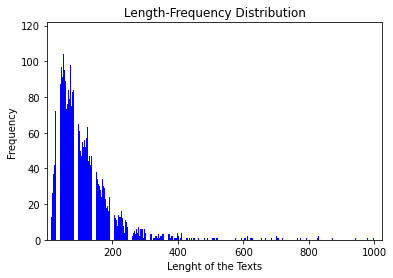

In [ ]:
import seaborn as sns

plt.bar(list(Length_frequency.keys()), Length_frequency.values(), color ='b')
plt.xlim(1, 1024)

plt.xlabel('Lenght of the Texts')
plt.ylabel('Frequency')
plt.title('Length-Frequency Distribution')

### Encoding Data into Numbers
To encode our text into numbers we will use  text_to_word_sequence function from keras.

In [ ]:
%%time
# Convert string into list of integer indices
sequences = tokenizer.texts_to_sequences(dataset['cleaned'])

CPU times: user 107 ms, sys: 0 ns, total: 107 ms
Wall time: 108 ms


In [ ]:
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))
print(dataset['cleaned'][1])
print(sequences[1])

Found 16251 unique tokens.
মাগি আগে কথা বলা শেখ তার পর ভিডিও বানাইস
[117, 87, 22, 230, 56, 33, 181, 313, 5934]


### Pad Sequence
To make all the texts fo the same length we will use pad sequence from keras to standardize their length.

Corpus contain our final processed data and labels contains the labels of associated data.

In [ ]:
%%time
## Before padding length of different training examples 
mx = len(sequences[0])
for x in sequences:
  mx =max(mx, len(x))
print("Maximum Text length",mx)

##We can also determine maxlen by plotting the frequency distribution of the lengths
corpus = keras.preprocessing.sequence.pad_sequences(sequences, value=0.0, padding='post', maxlen= 100)
## We get the maxlen value from the Length frequency distribution

print(corpus[1])


Maximum Text length 132
[ 117   87   22  230   56   33  181  313 5934    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0]
CPU times: user 24.5 ms, sys: 1.15 ms, total: 25.7 ms
Wall time: 27.9 ms


In [ ]:
print("Shape of the courpus: ", corpus.shape)

for i in range(2):
    print(dataset['cleaned'][i],"\n",corpus[i])

Shape of the courpus:  (5446, 100)
বর্তমানে শেখ পরিবার মানেই আলাদিনের চ্যাড়াগ কি রাজনৈতি মাইরি 
 [ 682   56  955  435 5930 5931    6 5932 5933    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0]
মাগি আগে কথা বলা শেখ তার পর ভিডিও বানাইস 
 [ 117   87   22  230   56   33  181  313 5934    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0  

## Creating Train, Test and Validation set


In [ ]:
X_train,X_test,y_train,y_test = train_test_split(corpus,dataset['Label'],test_size = 0.2, random_state = 0)

print("Training Size: ",X_train.shape)
print("Test Size: ",X_test.shape)

Training Size:  (4356, 100)
Test Size:  (1090, 100)


## CNN with Keras Embedding


In [ ]:
# Keras Functional API

import tensorflow as tf
from tensorflow import keras
from keras.layers import Input, Dense, Activation, Dropout,Flatten,Embedding
from keras.layers import Conv1D,MaxPooling1D,GlobalAveragePooling1D
from keras.models import Model
from tensorflow.keras.optimizers import Adam,SGD,Nadam,RMSprop
from tensorflow.keras.models import load_model

In [ ]:
keras.backend.clear_session()

max_length = 100
embedding_dim = 64
number_of_classes = len(dataset['Class'].unique())

# define CNN model

def CNN():

  input = Input(shape=(max_length,))
  embedding = Embedding(max_words, embedding_dim, input_length = 100)(input)
  conv1 = Conv1D(32,2,activation='relu')(embedding)
  pool1 = MaxPooling1D(2)(conv1)
  flat = Flatten()(pool1)
  output_layer = Dense(number_of_classes, activation='softmax')(flat)
  model = Model(inputs=input, outputs=output_layer)

  return model

# call the model
cnn_model = CNN()

cnn_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100)]             0         
                                                                 
 embedding (Embedding)       (None, 100, 64)           6400000   
                                                                 
 conv1d (Conv1D)             (None, 99, 32)            4128      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 49, 32)           0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 1568)              0         
                                                                 
 dense (Dense)               (None, 4)                 6276      
                                                             

In [ ]:
cnn_model.compile(optimizer = 'adam',
                      loss = 'sparse_categorical_crossentropy',
                      metrics =['accuracy'])

In [ ]:
%%time
history = cnn_model.fit(X_train,
                              y_train,
                              epochs = 20,
                              batch_size = 32,
                              verbose = 1,
                              validation_split =0.1)

Epoch 1/20
123/123 [==============================] - 2s 8ms/step - loss: 1.1954 - accuracy: 0.4551 - val_loss: 0.9436 - val_accuracy: 0.7408
Epoch 2/20
123/123 [==============================] - 1s 7ms/step - loss: 0.5606 - accuracy: 0.8413 - val_loss: 0.5278 - val_accuracy: 0.8463
Epoch 3/20
123/123 [==============================] - 1s 7ms/step - loss: 0.2347 - accuracy: 0.9214 - val_loss: 0.5219 - val_accuracy: 0.8417
Epoch 4/20
123/123 [==============================] - 1s 7ms/step - loss: 0.1187 - accuracy: 0.9742 - val_loss: 0.5862 - val_accuracy: 0.8005
Epoch 5/20
123/123 [==============================] - 1s 7ms/step - loss: 0.0563 - accuracy: 0.9929 - val_loss: 0.6467 - val_accuracy: 0.7936
Epoch 6/20
123/123 [==============================] - 1s 7ms/step - loss: 0.0263 - accuracy: 0.9982 - val_loss: 0.7092 - val_accuracy: 0.7890
Epoch 7/20
123/123 [==============================] - 1s 7ms/step - loss: 0.0135 - accuracy: 0.9992 - val_loss: 0.7421 - val_accuracy: 0.7867
Epoch 

#### Plotting accuracy and loss graphs

Finaly loss and accuracy graph is plotted to take some important decision such as after how many epochs our model starts to overfit, what batch size give us better result, whether we need to get more data or not.

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

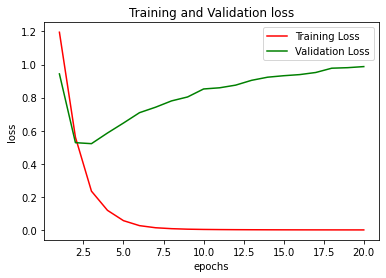

In [ ]:
import matplotlib.pyplot as plt

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, loss, 'r-', label='Training Loss')
plt.plot(epochs, val_loss, 'g', label = 'Validation Loss')
plt.title('Training and Validation loss')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

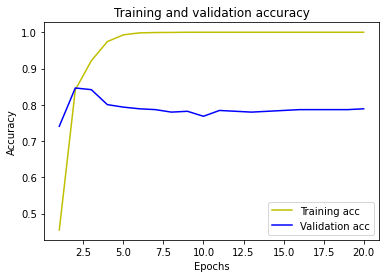

In [ ]:
plt.clf()   # clear figure

plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()


In [ ]:
y_pred = np.argmax(cnn_model.predict(X_test), axis=-1)
y_pred

array([2, 1, 2, ..., 1, 0, 2])

###Performance 

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.86      0.88       371
           1       0.94      0.89      0.91       324
           2       0.83      0.77      0.80       325
           3       0.28      0.51      0.36        70

    accuracy                           0.82      1090
   macro avg       0.74      0.76      0.74      1090
weighted avg       0.85      0.82      0.83      1090



In [ ]:
confusion_matrix(y_test,y_pred)

array([[318,   5,  21,  27],
       [  6, 289,   5,  24],
       [ 23,  10, 249,  43],
       [  6,   4,  24,  36]])

# CNN with Glove Word Embedding

[Link](https://github.com/sagorbrur/GloVe-Bengali)


In [ ]:
# download pretrained glove vectors
!wget -O bangla-glove-300d.zip https://www.dropbox.com/s/jimqem93cof5tww/bn_glove.39M.300d.zip?dl=0

In [ ]:
# extract the zip file and save the files into bangla-digit folder
import zipfile
zip_ref = zipfile.ZipFile("bangla-glove-300d.zip", 'r')
zip_ref.extractall("")
zip_ref.close()

In [ ]:
from gensim.scripts.glove2word2vec import glove2word2vec
glove2word2vec(glove_input_file='bn_glove.39M.300d.txt', word2vec_output_file="gensim_glove_vectors.txt")

(178153, 300)

In [ ]:
from gensim.models.keyedvectors import KeyedVectors
glove_model = KeyedVectors.load_word2vec_format("gensim_glove_vectors.txt", binary=False)

In [ ]:
vocabulary = glove_model.wv.vocab

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """Entry point for launching an IPython kernel.


In [ ]:
vocabulary

### Extracting word vector
Now we will extract the word vector. These word vectors will be assainged to the words of our model. 


- `vocabulary`: A list of words exist in the loaded model
- `word_to_vec_map`: dictionary mapping words to their GloVe vector representation.

In [ ]:
%%time

vocabulary = glove_model.wv.vocab
word_to_vec_map = {}

x = "aa"
for w in vocabulary:
  word_to_vec_map[w] = glove_model[w]
  x = w
print(x, word_to_vec_map[x].shape, word_to_vec_map[x]) # From this shape we will get our embedding dimension
print('Size of vocabulary:', len(vocabulary))

### Finding most frequent words
Now we will find some of the most frequent words of the model and similar words to them. That might be useful in future. Just use of some function

In [ ]:
%%time
frequent_words = glove_model.wv.index2entity[50:60]
for w in frequent_words:
  print('\n',w)
  similar_words = glove_model.wv.most_similar(w, topn=3)
  for wr, vec in similar_words:
     print(wr, vec)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  after removing the cwd from sys.path.



 আছে
রয়েছে 0.5870643854141235
অনেক 0.550443172454834
নেই 0.527860164642334

 একজন
যিনি 0.6538171172142029
ছিলেন 0.571128249168396
ব্যক্তি 0.5518900156021118

 যায়
পাওয়া 0.7962223291397095
গিয়েছিল 0.6485409736633301
পড়ে 0.6365272998809814

 হচ্ছে
করা 0.48764684796333313
যাচ্ছে 0.47582098841667175
এগুলো 0.47380131483078003

 হন
হয়েছিলেন 0.739832878112793
নির্বাচিত 0.6171943545341492
হয়েছেন 0.6106654405593872

 দলের
দল 0.6920536756515503
দলে 0.6245256662368774
দলটির 0.6236886978149414

 বিভিন্ন
নানা 0.6497145891189575
অন্যান্য 0.5586411952972412
বহু 0.5433717966079712

 তা
সেটি 0.5834987163543701
যে 0.5711970329284668
কিন্তু 0.569290280342102

 হয়ে
পড়ে 0.6394785046577454
যায় 0.631236732006073
থাকে 0.582851231098175

 বাংলাদেশ
বাংলাদেশের 0.5982800722122192
মিরপুর১৮ 0.5265884399414062
মিরপুর১৫ 0.525682806968689
CPU times: user 523 ms, sys: 170 ms, total: 692 ms
Wall time: 503 ms


### Creating Embeding Matrix
Now, we will build an embedding matrix that we can load into an Embedding layer. It must be a matrix of shape `(max_words, embedding_dim)`, where each entry i contains
the embedding_dim - dimensional vector for the word of index iin the reference word index. 

In [ ]:
max_words = 100000 # Most frequent 100000 words (It should be initialize during tokenization process)
embedding_dim = 300 # embedding dimension of the model

embedding_matrix = np.zeros((max_words, embedding_dim), dtype = float)

c = 0
for word, i in word_index.items():
    if i < max_words:
      embedding_vector = word_to_vec_map.get(word)
      if embedding_vector is None:
          c +=1;
          #print(word)
      if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector
# Words not found in the pretrained model is assigned as zeros
print("Number of words not in the vocabulary: ", c)
print("Percentage of words not in the vocabulary: ", (c/max_words)*100)

###Checkpoint

In [ ]:
''' Callbacks with Checkpoint'''

accuracy_threshold = 0.99

class myCallback(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
      if(logs.get('accuracy')>accuracy_threshold):
        print("\nReached %2.2f%% accuracy so we will stop trianing" % (accuracy_threshold*100))
        self.model.stop_training = True

acc_callback = myCallback()
  # Saved the Best Model
filepath = "mymodel.h5"
checkpoint = keras.callbacks.ModelCheckpoint(filepath, monitor='val_accuracy', verbose=2, save_best_only=True, 
                                             save_weights_only=False, mode='max')
  # callback list
callback_list = [acc_callback, checkpoint] 


### Defining the Model


In [ ]:
keras.backend.clear_session()

max_length = 100
embedding_dim = 300
number_of_classes = len(dataset['Class'].unique())

# define CNN model

def CNN():

  input = Input(shape=(max_length,))
  embedding = Embedding(max_words, embedding_dim, input_length = 100, weights=[embedding_matrix], trainable=False)(input)
  conv1 = Conv1D(32,2,activation='relu')(embedding)
  pool1 = MaxPooling1D(2)(conv1)
  flat = Flatten()(pool1)
  output_layer = Dense(number_of_classes, activation='softmax')(flat)
  model = Model(inputs=input, outputs=output_layer)

  return model

# call the model
cnn_model_pretrained = CNN()

cnn_model_pretrained.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100)]             0         
                                                                 
 embedding (Embedding)       (None, 100, 300)          30000000  
                                                                 
 conv1d (Conv1D)             (None, 99, 32)            19232     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 49, 32)           0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 1568)              0         
                                                                 
 dense (Dense)               (None, 4)                 6276      
                                                             

In [ ]:
cnn_model_pretrained.compile(optimizer = 'adam',
                      loss = 'sparse_categorical_crossentropy',
                      metrics =['accuracy'])

In [ ]:
%%time
history = cnn_model_pretrained.fit(X_train,
                              y_train,
                              epochs = 20,
                              batch_size = 32,
                              verbose = 1,
                              validation_split =0.1,
                              callbacks = callback_list)

Epoch 1/20
118/123 [===========================>..] - ETA: 0s - loss: 0.9640 - accuracy: 0.6419
Epoch 1: val_accuracy did not improve from 0.81881
123/123 [==============================] - 1s 5ms/step - loss: 0.9548 - accuracy: 0.6457 - val_loss: 0.6462 - val_accuracy: 0.7982
Epoch 2/20
109/123 [=========================>....] - ETA: 0s - loss: 0.5794 - accuracy: 0.7982
Epoch 2: val_accuracy improved from 0.81881 to 0.82110, saving model to mymodel.h5
123/123 [==============================] - 1s 5ms/step - loss: 0.5802 - accuracy: 0.7980 - val_loss: 0.5695 - val_accuracy: 0.8211
Epoch 3/20
115/123 [===========================>..] - ETA: 0s - loss: 0.4774 - accuracy: 0.8348
Epoch 3: val_accuracy improved from 0.82110 to 0.82339, saving model to mymodel.h5
123/123 [==============================] - 1s 6ms/step - loss: 0.4752 - accuracy: 0.8357 - val_loss: 0.5538 - val_accuracy: 0.8234
Epoch 4/20
117/123 [===========================>..] - ETA: 0s - loss: 0.3993 - accuracy: 0.8670
Epoch 

#### Plotting accuracy and loss graphs

Finaly loss and accuracy graph is plotted to take some important decision such as after how many epochs our model starts to overfit, what batch size give us better result, whether we need to get more data or not.

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

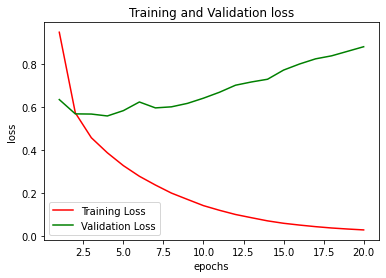

In [ ]:
import matplotlib.pyplot as plt

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, loss, 'r-', label='Training Loss')
plt.plot(epochs, val_loss, 'g', label = 'Validation Loss')
plt.title('Training and Validation loss')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

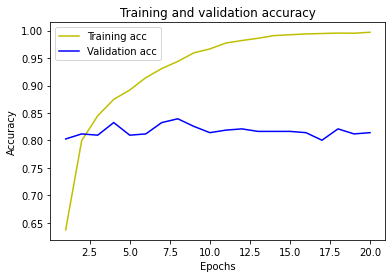

In [ ]:
plt.clf()   # clear figure

plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()


In [ ]:
# Recreate the exact same model purely from the file:
model = load_model("mymodel.h5")

In [ ]:
y_pred = np.argmax(model.predict(X_test), axis=-1)
y_pred

array([2, 1, 2, ..., 1, 0, 2])

###Performance 

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87       371
           1       0.87      0.86      0.87       324
           2       0.77      0.82      0.80       325
           3       0.57      0.19      0.28        70

    accuracy                           0.82      1090
   macro avg       0.76      0.69      0.70      1090
weighted avg       0.81      0.82      0.81      1090



In [ ]:
confusion_matrix(y_test,y_pred)

array([[333,  12,  24,   2],
       [ 22, 280,  18,   4],
       [ 30,  23, 268,   4],
       [ 12,   6,  39,  13]])